In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns


In [30]:

crashes = pd.read_csv("./data/Traffic_Crashes_-_Crashes.csv.gz")
people = pd.read_csv("./data/Traffic_Crashes_-_People.csv.gz")
vehicles = pd.read_csv("./data/Traffic_Crashes_-_Vehicles.csv.gz")


c:\Users\sharo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\Users\sharo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,39,40,41,47,48,49,57,58,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
print(crashes.shape)
crashes.columns


(54959, 48)


Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [32]:
print(people.shape)
people.columns


(120061, 29)


Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [33]:
print(vehicles.shape)
vehicles.columns

(111727, 71)


Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [34]:
# 2. Create the SQL Engine in Memory (RAM)
conn = sqlite3.connect(':memory:')


In [35]:

# 3. Upload data to SQL (This takes a few seconds)
crashes.to_sql('Traffic_Crashes_Crashes', conn, index=False, if_exists='replace')
people.to_sql('Traffic_Crashes_People', conn, index=False, if_exists='replace')
vehicles.to_sql('Traffic_Crashes_Vehicles', conn, index=False, if_exists='replace')


c:\Users\sharo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [36]:

# 4. Paste the Query String
query = """SELECT 
    c.CRASH_RECORD_ID,
    c.PRIM_CONTRIBUTORY_CAUSE,   
    c.CRASH_HOUR,
    c.CRASH_DAY_OF_WEEK,
    c.CRASH_MONTH,
    c.POSTED_SPEED_LIMIT,
    c.WEATHER_CONDITION,
    c.LIGHTING_CONDITION,
    c.ROADWAY_SURFACE_COND,
    c.ROAD_DEFECT,
    c.TRAFFIC_CONTROL_DEVICE,
    c.FIRST_CRASH_TYPE,
    COALESCE(p.TOTAL_PEOPLE, 0) AS TOTAL_PEOPLE,
    p.AGE,
    COALESCE(p.DRUNK_DRIVERS_COUNT, 0) AS DRUNK_DRIVERS_COUNT,
    COALESCE(v.TOTAL_VEHICLES, 0) AS TOTAL_VEHICLES,
    COALESCE(v.DEFECTIVE_VEHICLES_COUNT, 0) AS DEFECTIVE_VEHICLES_COUNT

FROM Traffic_Crashes_Crashes c
LEFT JOIN (
    SELECT 
        CRASH_RECORD_ID,
        COUNT(PERSON_ID) AS TOTAL_PEOPLE,
        MAX(AGE) AS AGE,
        SUM(CASE WHEN PHYSICAL_CONDITION LIKE '%ALCOHOL%' THEN 1 ELSE 0 END) AS DRUNK_DRIVERS_COUNT
    FROM Traffic_Crashes_People
    GROUP BY CRASH_RECORD_ID
) p ON c.CRASH_RECORD_ID = p.CRASH_RECORD_ID
LEFT JOIN (
    SELECT 
        CRASH_RECORD_ID,
        COUNT(VEHICLE_ID) AS TOTAL_VEHICLES,
        SUM(CASE WHEN VEHICLE_DEFECT NOT IN ('NONE', 'UNKNOWN') THEN 1 ELSE 0 END) AS DEFECTIVE_VEHICLES_COUNT
    FROM Traffic_Crashes_Vehicles
    GROUP BY CRASH_RECORD_ID
) v ON c.CRASH_RECORD_ID = v.CRASH_RECORD_ID;
"""


In [37]:

# 5. Execute and get your Clean Dataset
data = pd.read_sql_query(query, conn)


In [38]:
data.shape

(54959, 17)

In [39]:
data.columns

Index(['CRASH_RECORD_ID', 'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'TRAFFIC_CONTROL_DEVICE', 'FIRST_CRASH_TYPE',
       'TOTAL_PEOPLE', 'AGE', 'DRUNK_DRIVERS_COUNT', 'TOTAL_VEHICLES',
       'DEFECTIVE_VEHICLES_COUNT'],
      dtype='object')

In [40]:
data.isnull().sum()

CRASH_RECORD_ID                0
PRIM_CONTRIBUTORY_CAUSE        0
CRASH_HOUR                     0
CRASH_DAY_OF_WEEK              0
CRASH_MONTH                    0
POSTED_SPEED_LIMIT             0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
TRAFFIC_CONTROL_DEVICE         0
FIRST_CRASH_TYPE               0
TOTAL_PEOPLE                   0
AGE                         9219
DRUNK_DRIVERS_COUNT            0
TOTAL_VEHICLES                 0
DEFECTIVE_VEHICLES_COUNT       0
dtype: int64

In [41]:
median_age = data['AGE'].median()
data['AGE'] = data['AGE'].fillna(median_age)

In [42]:
data.isnull().sum()

CRASH_RECORD_ID             0
PRIM_CONTRIBUTORY_CAUSE     0
CRASH_HOUR                  0
CRASH_DAY_OF_WEEK           0
CRASH_MONTH                 0
POSTED_SPEED_LIMIT          0
WEATHER_CONDITION           0
LIGHTING_CONDITION          0
ROADWAY_SURFACE_COND        0
ROAD_DEFECT                 0
TRAFFIC_CONTROL_DEVICE      0
FIRST_CRASH_TYPE            0
TOTAL_PEOPLE                0
AGE                         0
DRUNK_DRIVERS_COUNT         0
TOTAL_VEHICLES              0
DEFECTIVE_VEHICLES_COUNT    0
dtype: int64

### Visualization

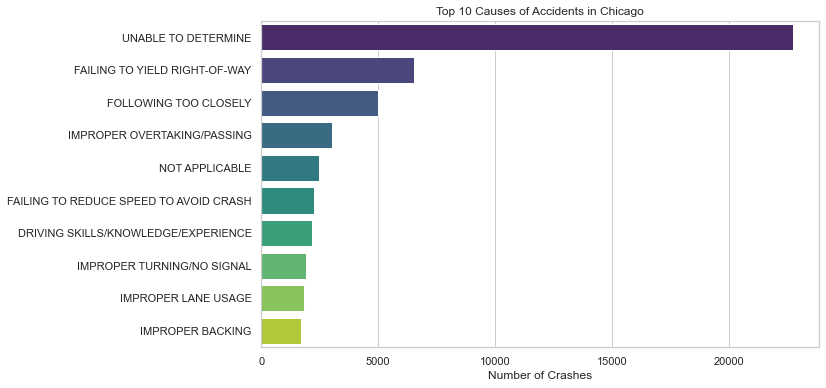

In [44]:
sns.set_theme(style="whitegrid")
# Plot the Top 10 Causes
plt.figure(figsize=(10, 6))
top_causes = data['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(10)
sns.barplot(x=top_causes.values, y=top_causes.index, palette='viridis')
plt.title('Top 10 Causes of Accidents in Chicago')
plt.xlabel('Number of Crashes')
plt.show()